In [37]:
import biofeatures
import biosignalsnotebooks as bsnb
import numpy as np

data, header = bsnb.load("Sensor data/ECG.h5", get_header=True)

sampling_rate = header["sampling rate"]
channel = list(data.keys())[1]

signal = data[channel]

In [5]:
import biofeatures
import biosignalsnotebooks as bsnb
import numpy as np

signal = np.loadtxt("ecg2505.csv", delimiter=',')
sampling_rate = 200

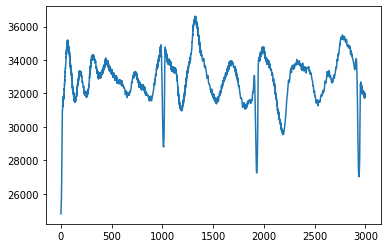

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(signal[:3000])

HRV = biofeatures.hrv(data = signal, buffer_length=5000, srate=sampling_rate)


In [39]:
HRV.r_peak_intervals(data = signal)
print(HRV.r_intervals)

[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 1072  951  861  928  806
  851  818  784  967 1025 1034  922 1008  952  920  936 1027 1146 1136
 1167 1051 1042 1056 1033  961 1061 1081  990  976  992  975  857 1059
 1137 1077 1042  980  849  911  966  829  951 1029 1034  917  893  924
  957  878  966 1025  993  967  899  960  926  864  873  933  901  999
 1029  966  946  981 1005  940  807  843  957  958  382  591  222  575
  500  417  738  879  888  822  755  827  876  934  766  833 1067 1057
  995  969  492  393  710  246  987  980  437  442  830  867  794  878
  907  517  388  653  385  370  225  269  892  772  784  837  865  784
  850  826  855  996  958 1001  895  922  754]


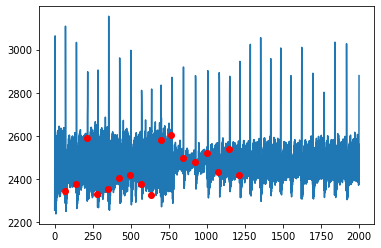

In [11]:
sampling_rate = HRV.srate

plt_peaks = (np.array(HRV.peaks[0][:17]) * sampling_rate).astype(int)

plt.figure()
plt.plot(signal[: sampling_rate * 10])
plt.plot(plt_peaks, signal[plt_peaks], 'ro')


In [40]:
HRV.hrv_features()

print(HRV.features)

[{'nni_mean': 824.92, 'hr_mean': 84.33, 'hr_std': 45.03, 'rmssd': 205.39, 'lf': 6004.52, 'hf': 4781.09, 'LF/HF ratio': 1.26}]


In [2]:
HRV = biofeatures.hrv(signal, srate = sampling_rate)

In [4]:
HRV.r_peak_intervals(HRV.data)

In [53]:
HRV.r_intervals

array([ 826,  920, 1007,  998,  511,  383,  325,  630,  902,  270,  393,
        503,  472,  567,  276,  693,  843,  590,  224,  909, 1120,  421,
        719, 1072,  951,  861,  928,  806,  851,  818,  784,  967, 1025,
       1034,  922, 1008,  952,  920,  936, 1027, 1146, 1136, 1167, 1051,
       1042, 1056, 1033,  961, 1061, 1081,  990,  976,  992,  975,  857,
       1059, 1137, 1077, 1042,  980,  849,  911,  966,  829,  951, 1029,
       1034,  917,  893,  924,  957,  878,  966, 1025,  993,  967,  899,
        960,  926,  864,  873,  933,  901,  999, 1029,  966,  946,  981,
       1005,  940,  807,  843,  957,  958,  382,  591,  222,  575,  500,
        417,  738,  879,  888,  822,  755,  827,  876,  934,  766,  833,
       1067, 1057,  995,  969,  492,  393,  710,  246,  987,  980,  437,
        442,  830,  867,  794,  878,  907,  517,  388,  653,  385,  370,
        225,  269,  892,  772,  784,  837,  865,  784,  850,  826,  855,
        996,  958, 1001,  895,  922,  754])

In [6]:
HRV.hrv_features()

In [7]:
HRV.features

[{'nni_mean': 824.9194630872483,
  'hr_mean': 84.33210854982532,
  'hr_std': 45.02873656098175,
  'rmssd': 205.39020214006106,
  'lf': 6004.521268964863,
  'hf': 4781.092420945251,
  'LF/HF ratio': 1.2558889768915473}]

In [8]:
HRV.feature_names

dict_keys(['nni_mean', 'hr_mean', 'hr_std', 'rmssd', 'lf', 'hf', 'LF/HF ratio'])

In [14]:
HRV.detect_trends()

In [10]:
HRV.features = HRV.features + HRV.features

In [11]:
HRV.features

[{'nni_mean': 824.9194630872483,
  'hr_mean': 84.33210854982532,
  'hr_std': 45.02873656098175,
  'rmssd': 205.39020214006106,
  'lf': 6004.521268964863,
  'hf': 4781.092420945251,
  'LF/HF ratio': 1.2558889768915473},
 {'nni_mean': 824.9194630872483,
  'hr_mean': 84.33210854982532,
  'hr_std': 45.02873656098175,
  'rmssd': 205.39020214006106,
  'lf': 6004.521268964863,
  'hf': 4781.092420945251,
  'LF/HF ratio': 1.2558889768915473}]

In [12]:
HRV.detect_trends()

In [1]:
HRV.current_trends

NameError: name 'HRV' is not defined

# Test 30min recording

In [1]:
import csv, json
import numpy as np

with open("Sensor data/ECG_long.txt") as datafile:
    readdata = csv.reader(datafile, delimiter='\t')
    header = [next(readdata), next(readdata), next(readdata)]
    header_json = json.loads(header[1][0][1:])
print(header_json)

data = np.genfromtxt("Sensor data/ECG_long.txt")
print(data.shape)


{'20:18:05:28:46:81': {'sensor': ['ECGBIT'], 'device name': '20:18:05:28:46:81', 'column': ['nSeq', 'I1', 'I2', 'O1', 'O2', 'A1'], 'sync interval': 2, 'time': '13:54:1.892', 'comments': '', 'device connection': '/dev/tty.BITalino-46-81-DevB', 'channels': [1], 'keywords': '', 'convertedValues': 0, 'mode': 0, 'digital IO': [0, 0, 1, 1], 'firmware version': 1281, 'device': 'bitalino_rev', 'position': 0, 'sampling rate': 100, 'label': ['A1'], 'resolution': [4, 1, 1, 1, 1, 10], 'date': '2020-2-24', 'special': [{}]}}
(182295, 6)


In [2]:
sampling_rate = header_json[list(header_json.keys())[0]]['sampling rate']

In [3]:
signal = data[:,-1]
signal[:10]

array([519., 517., 516., 516., 518., 519., 519., 518., 521., 523.])

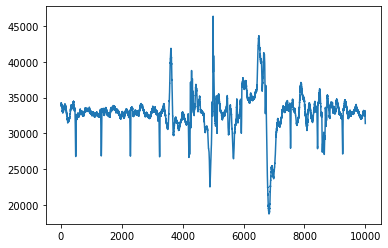

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(signal[80000:90000])

In [45]:
import biofeatures

HRV = biofeatures.hrv(signal, srate = sampling_rate)
HRV.r_peak_intervals(HRV.data)

In [46]:
HRV.r_intervals

array([ 826,  920, 1007,  998,  511,  383,  325,  630,  902,  270,  393,
        503,  472,  567,  276,  693,  843,  590,  224,  909, 1120,  421,
        719, 1072,  951,  861,  928,  806,  851,  818,  784,  967, 1025,
       1034,  922, 1008,  952,  920,  936, 1027, 1146, 1136, 1167, 1051,
       1042, 1056, 1033,  961, 1061, 1081,  990,  976,  992,  975,  857,
       1059, 1137, 1077, 1042,  980,  849,  911,  966,  829,  951, 1029,
       1034,  917,  893,  924,  957,  878,  966, 1025,  993,  967,  899,
        960,  926,  864,  873,  933,  901,  999, 1029,  966,  946,  981,
       1005,  940,  807,  843,  957,  958,  382,  591,  222,  575,  500,
        417,  738,  879,  888,  822,  755,  827,  876,  934,  766,  833,
       1067, 1057,  995,  969,  492,  393,  710,  246,  987,  980,  437,
        442,  830,  867,  794,  878,  907,  517,  388,  653,  385,  370,
        225,  269,  892,  772,  784,  837,  865,  784,  850,  826,  855,
        996,  958, 1001,  895,  922,  754])

In [8]:
HRV.hrv_features()

In [9]:
HRV.features

[{'nni_mean': 913.92,
  'hr_mean': 66.29,
  'hr_std': 7.7,
  'rmssd': 80.08,
  'lf': 2223.36,
  'hf': 1977.05,
  'LF/HF ratio': 1.12}]

In [47]:
len(HRV.data)

123900

In [49]:
123900/(60*30)

68.83333333333333

In [58]:
HRV_rt = biofeatures.hrv([], srate = sampling_rate, buffer_length=5000)
all_trends = []
signal = np.array(signal)

for i in range(1,60):
    data = signal[:i * 5000]
    HRV_rt.set_data(data[-HRV_rt.buffer_length:])
    HRV_rt.r_peak_intervals(data)
    print(HRV_rt.r_intervals)

    HRV_rt.hrv_features()
    print(HRV_rt.features[-1])
    
    if i > 1:
        HRV_rt.detect_trends()
        all_trends.append(HRV_rt.current_trends)

[ 826  920 1007  998]
{'nni_mean': 937.75, 'hr_mean': 64.39, 'hr_std': 6.06, 'rmssd': 74.13, 'lf': 281.97, 'hf': 1185.36, 'LF/HF ratio': 0.24}
[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276]
{'nni_mean': 598.87, 'hr_mean': 121.5, 'hr_std': 55.23, 'rmssd': 262.1, 'lf': 9018.22, 'hf': 53529.62, 'LF/HF ratio': 0.17}
[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719]
{'nni_mean': 630.52, 'hr_mean': 117.19, 'hr_std': 59.32, 'rmssd': 333.52, 'lf': 14443.83, 'hf': 22532.68, 'LF/HF ratio': 0.64}
[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 1072  951  861  928  806]
{'nni_mean': 682.86, 'hr_mean': 107.97, 'hr_std': 57.27, 'rmssd': 311.15, 'lf': 22063.98, 'hf': 38109.43, 'LF/HF ratio': 0.58}
[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 1072  951  861  928  80

[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 1072  951  861  928  806
  851  818  784  967 1025 1034  922 1008  952  920  936 1027 1146 1136
 1167 1051 1042 1056 1033  961 1061 1081  990  976  992  975  857 1059
 1137 1077 1042  980  849  911  966  829  951 1029 1034  917  893  924
  957  878  966 1025  993  967  899  960  926  864  873  933  901  999
 1029  966  946  981 1005  940  807  843  957  958  382  591  222  575
  500  417  738  879  888  822  755  827  876  934  766  833 1067 1057
  995  969  492  393  710  246  987  980  437  442  830  867]
{'nni_mean': 843.03, 'hr_mean': 81.76, 'hr_std': 42.79, 'rmssd': 209.81, 'lf': 3726.28, 'hf': 2762.43, 'LF/HF ratio': 1.35}
[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 1072  951  861  928  806
  851  818  784  967 1025 1034  922 1008  952  920  936 1027 1146 1136
 1167 1051 1042 1056 1033  961 10

[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 1072  951  861  928  806
  851  818  784  967 1025 1034  922 1008  952  920  936 1027 1146 1136
 1167 1051 1042 1056 1033  961 1061 1081  990  976  992  975  857 1059
 1137 1077 1042  980  849  911  966  829  951 1029 1034  917  893  924
  957  878  966 1025  993  967  899  960  926  864  873  933  901  999
 1029  966  946  981 1005  940  807  843  957  958  382  591  222  575
  500  417  738  879  888  822  755  827  876  934  766  833 1067 1057
  995  969  492  393  710  246  987  980  437  442  830  867  794  878
  907  517  388  653  385  370  225  269  892  772  784  837  865  784
  850  826  855  996  958 1001  895  922  754]
{'nni_mean': 824.92, 'hr_mean': 84.33, 'hr_std': 45.03, 'rmssd': 205.39, 'lf': 6004.52, 'hf': 4781.09, 'LF/HF ratio': 1.26}
[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 10

[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 1072  951  861  928  806
  851  818  784  967 1025 1034  922 1008  952  920  936 1027 1146 1136
 1167 1051 1042 1056 1033  961 1061 1081  990  976  992  975  857 1059
 1137 1077 1042  980  849  911  966  829  951 1029 1034  917  893  924
  957  878  966 1025  993  967  899  960  926  864  873  933  901  999
 1029  966  946  981 1005  940  807  843  957  958  382  591  222  575
  500  417  738  879  888  822  755  827  876  934  766  833 1067 1057
  995  969  492  393  710  246  987  980  437  442  830  867  794  878
  907  517  388  653  385  370  225  269  892  772  784  837  865  784
  850  826  855  996  958 1001  895  922  754]
{'nni_mean': 824.92, 'hr_mean': 84.33, 'hr_std': 45.03, 'rmssd': 205.39, 'lf': 6004.52, 'hf': 4781.09, 'LF/HF ratio': 1.26}
[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 10

[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 1072  951  861  928  806
  851  818  784  967 1025 1034  922 1008  952  920  936 1027 1146 1136
 1167 1051 1042 1056 1033  961 1061 1081  990  976  992  975  857 1059
 1137 1077 1042  980  849  911  966  829  951 1029 1034  917  893  924
  957  878  966 1025  993  967  899  960  926  864  873  933  901  999
 1029  966  946  981 1005  940  807  843  957  958  382  591  222  575
  500  417  738  879  888  822  755  827  876  934  766  833 1067 1057
  995  969  492  393  710  246  987  980  437  442  830  867  794  878
  907  517  388  653  385  370  225  269  892  772  784  837  865  784
  850  826  855  996  958 1001  895  922  754]
{'nni_mean': 824.92, 'hr_mean': 84.33, 'hr_std': 45.03, 'rmssd': 205.39, 'lf': 6004.52, 'hf': 4781.09, 'LF/HF ratio': 1.26}
[ 826  920 1007  998  511  383  325  630  902  270  393  503  472  567
  276  693  843  590  224  909 1120  421  719 10

In [20]:
len(HRV_rt.features)

119

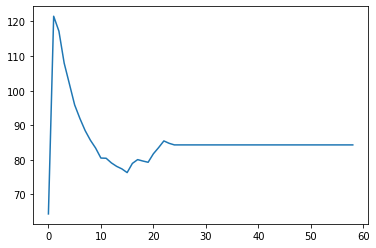

In [59]:
plt.plot([f["hr_mean"] for f in HRV_rt.features])

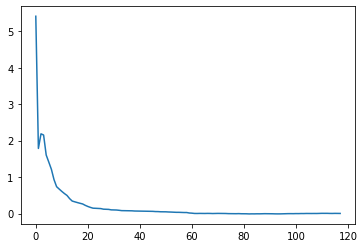

In [26]:
plt.plot([t["hr_mean"] for t in all_trends])

In [ ]:
for i in range(1,150):
    print(all_trends[i]['rmssd'] * 1000/HRV_rt.features[i]['rmssd'])

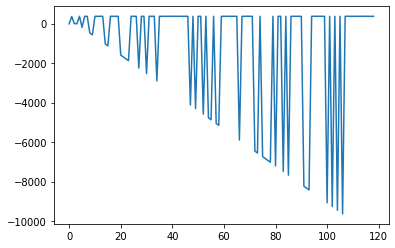

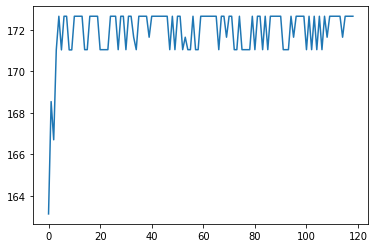

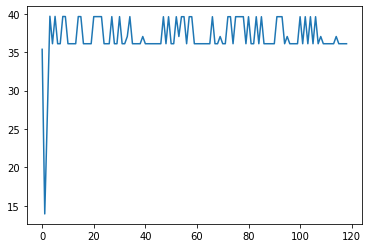

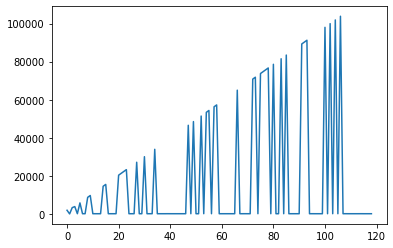

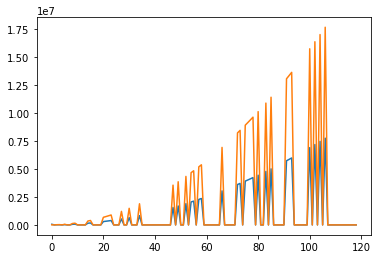

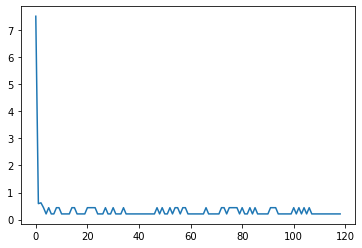

In [27]:
plt.figure(0)
plt.plot([f["nni_mean"] for f in HRV_rt.features])
plt.figure(1)
plt.plot([f["hr_mean"] for f in HRV_rt.features])
plt.figure(2)
plt.plot([f["hr_std"] for f in HRV_rt.features])
plt.figure(3)
plt.plot([f["rmssd"] - 60 for f in HRV_rt.features])
plt.figure(4)
plt.plot([f["lf"] for f in HRV_rt.features])
plt.plot([f["hf"] for f in HRV_rt.features])
plt.figure(5)
plt.plot([f["LF/HF ratio"] for f in HRV_rt.features])